In [1]:
!pip install torch torchvision


In [0]:
import torch
import matplotlib.pyplot as plt 
import numpy as np
import torch.nn.functional as F
from torch import nn
from torchvision import datasets, transforms, models

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#device = "cpu"
print(device)

cuda:0


In [4]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

  Created wheel for gputil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7410 sha256=8bb475ab616c00bc464bab47e3abd7f963cfde4413fc979c38d0291aa78ebfe3
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil
Gen RAM Free: 12.7 GB  | Proc size: 264.4 MB
GPU RAM Free: 11430MB | Used: 11MB | Util   0% | Total 11441MB


# Importar dataset

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#!ls '/content/drive/My Drive/Colab_Notebooks/Resources/trabalho_deep1'
pathXRayImages =  '/content/drive/My Drive/Colab_Notebooks/Resources/trabalho_deep1'

In [0]:
#!ls '/content/drive/My Drive/Colab_Notebooks/Resources/trabalho_deep1/train/NORMAL'

In [0]:
from PIL import Image

std = []

PATHTrain = pathXRayImages + '/train/'
PATHTest = pathXRayImages + '/test/'
PATHVal = pathXRayImages + '/val/'
#files = os.listdir(PATH)
#x = np.array([np.array(Image.open(PATH + fname)) for fname in files])

In [0]:
#for fname in files:
#  x = np.array([np.array(Image.open(PATH + fname))])
#  print(x.shape,fname)
  
                
  

In [0]:
#print(count(x[0].shape))

In [0]:
def im_convert(tensor):
  image = tensor.cpu().clone().detach().numpy()
  image = image.transpose(1,2,0)
  #print(image.shape)
  #retirar a normalização
  image = image * np.array((0.5,0.5,0.5)) + np.array((0.5,0.5,0.5))
  image = image.clip(0,1)
  return image

In [0]:
def getitem(self, item): 
  image, label = self.imgs[item] 
  image = Image.open(image) 
  img = transform(image) 
  return img, label

In [0]:
classes = (
    'NORMAL','PNEUMONIA'
    )

In [13]:
transform_train = transforms.Compose([transforms.Resize((256,256)),
                                      #transforms.CenterCrop(224),
                                      transforms.RandomCrop(224),
                                      transforms.RandomHorizontalFlip(),
                                      #transforms.RandomRotation(10),
                                      transforms.RandomAffine(0,shear=10,scale=(0.8,1.6)),
                                      #transforms.ColorJitter(brightness=0.2,contrast=0.2,saturation=0.2),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])])


transform = transforms.Compose([transforms.Resize((256,256)),
                                transforms.ToTensor(),
                                 transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])])

training_dataset = datasets.ImageFolder(root=PATHTrain,transform=transform_train)
validation_dataset = datasets.ImageFolder(root=PATHVal,transform=transform)
training_loader = torch.utils.data.DataLoader(dataset=training_dataset,batch_size=100,shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset,batch_size=100,shuffle=False)

test_dataset = datasets.ImageFolder(root=PATHTest,transform=transform)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,batch_size=100,shuffle=True)


print(len(training_loader))
print(len(validation_loader))
print(len(test_loader))


53
1
7


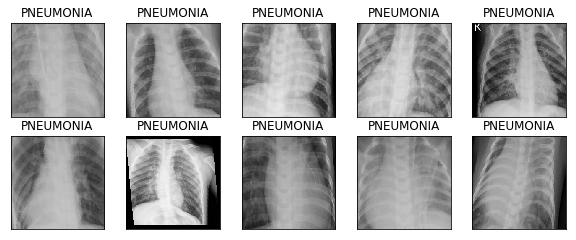

In [14]:
dataiter = iter(training_loader)
images,labels = dataiter.next()

fig = plt.figure(figsize=(10,10))

for idx in np.arange(10):
  ax = fig.add_subplot(5,5,idx+1,xticks=[],yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title(classes[labels[idx].item()])

In [0]:



model = models.resnet50(pretrained=False)
#model



In [16]:
model.fc = nn.Linear(2048, 2)  
model.to(device)
#model



ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [17]:
import time
start_time = time.time()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

print('levou {} segundos '.format(time.time() - start_time))

levou 0.0018053054809570312 segundos 


In [18]:
CUDA_LAUNCH_BLOCKING=1

import time
start_time = time.time()



epochs = 10

running_loss_history=[]
running_corrects_history=[]

val_running_loss_history=[]
val_running_corrects_history=[]


for e in range(epochs):
  running_loss = 0.0
  running_corrects = 0.0
  val_running_loss = 0.0
  val_running_corrects = 0.0
  
  for inputs, labels in training_loader:
    inputs = inputs.to(device)
    #print(len(inputs))
    labels = labels.to(device)
    #print(len(labels))
    outputs = model(inputs)
    #print(len(outputs))  
    
    
    
    
    loss = criterion(outputs,labels)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    _,preds = torch.max(outputs,1)    
    running_loss += loss.item()
    running_corrects+= torch.sum(preds == labels.data)    
    
  else:
    with torch.no_grad():
      for val_inputs, val_labels in validation_loader:
        val_inputs = val_inputs.to(device)
        val_labels = val_labels.to(device)
        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs,val_labels)        
        
        _,val_preds = torch.max(val_outputs,1)
        val_running_loss += val_loss.item()
        val_running_corrects+= torch.sum(val_preds == val_labels.data)  
      
    epoch_loss = running_loss/len(training_loader.dataset)
    #epoch_loss = calcula o loss function atual
    epoch_acc = running_corrects.float()/len(training_loader.dataset)
    #epoch_acc = pega a quantiade de acertos que teve em relacao ao total e seta a porcentagem de acertos
    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_acc)
    
    val_epoch_loss = val_running_loss/len(validation_loader.dataset)
    #epoch_loss = calcula o loss function atual
    val_epoch_acc = val_running_corrects.float()/len(validation_loader.dataset)
    #epoch_acc = pega a quantiade de acertos que teve em relacao ao total e seta a porcentagem de acertos
    val_running_loss_history.append(val_epoch_loss)    
    val_running_corrects_history.append(val_epoch_acc)    
    
    print('epoch: ',str(e+1))
    print('train_loss: {:.4f},{:.4f}'.format(epoch_loss,epoch_acc.item()))
    print('valid_loss: {:.4f}, \nvalid_acc {:.4f}'.format(val_epoch_loss,val_epoch_acc.item()))
    #print('difference between loss:', val_epoch_loss-epoch_loss)

    
print('levou {} segundos '.format(time.time() - start_time))

epoch:  1
train_loss: 0.0051,0.8230
valid_loss: 0.0667, 
valid_acc 0.5625
epoch:  2
train_loss: 0.0025,0.8988
valid_loss: 0.0830, 
valid_acc 0.6875
epoch:  3
train_loss: 0.0023,0.9103
valid_loss: 0.1180, 
valid_acc 0.6250
epoch:  4
train_loss: 0.0020,0.9199
valid_loss: 0.0895, 
valid_acc 0.6250
epoch:  5
train_loss: 0.0019,0.9258
valid_loss: 0.0796, 
valid_acc 0.6250
epoch:  6
train_loss: 0.0017,0.9365
valid_loss: 0.0761, 
valid_acc 0.6875
epoch:  7
train_loss: 0.0016,0.9411
valid_loss: 0.0757, 
valid_acc 0.7500
epoch:  8
train_loss: 0.0019,0.9300
valid_loss: 0.0948, 
valid_acc 0.6875
epoch:  9
train_loss: 0.0018,0.9340
valid_loss: 0.1099, 
valid_acc 0.6875
epoch:  10
train_loss: 0.0017,0.9337
valid_loss: 0.0853, 
valid_acc 0.6875
levou 3497.3717482089996 segundos 


In [0]:
#training_loss: 0.8267,71.0100
#validation_loss: 0.7724, validation acc 73.7500
#difference between loss: -0.0543566477298737

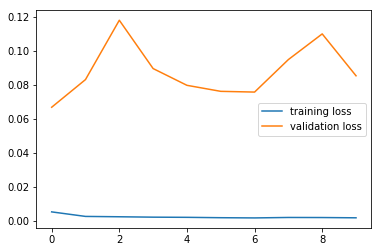

In [20]:
plt.plot(running_loss_history,label='training loss')
plt.plot(val_running_loss_history,label='validation loss')
plt.legend()


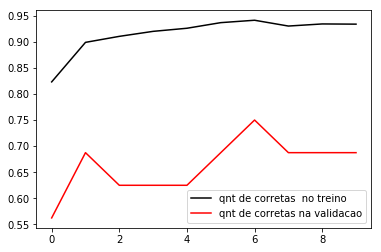

In [21]:
plt.plot(running_corrects_history,label='qnt de corretas  no treino',color="black")
plt.plot(val_running_corrects_history,label='qnt de corretas na validacao', color='red')
plt.legend()

acertos: 10 
erros:6


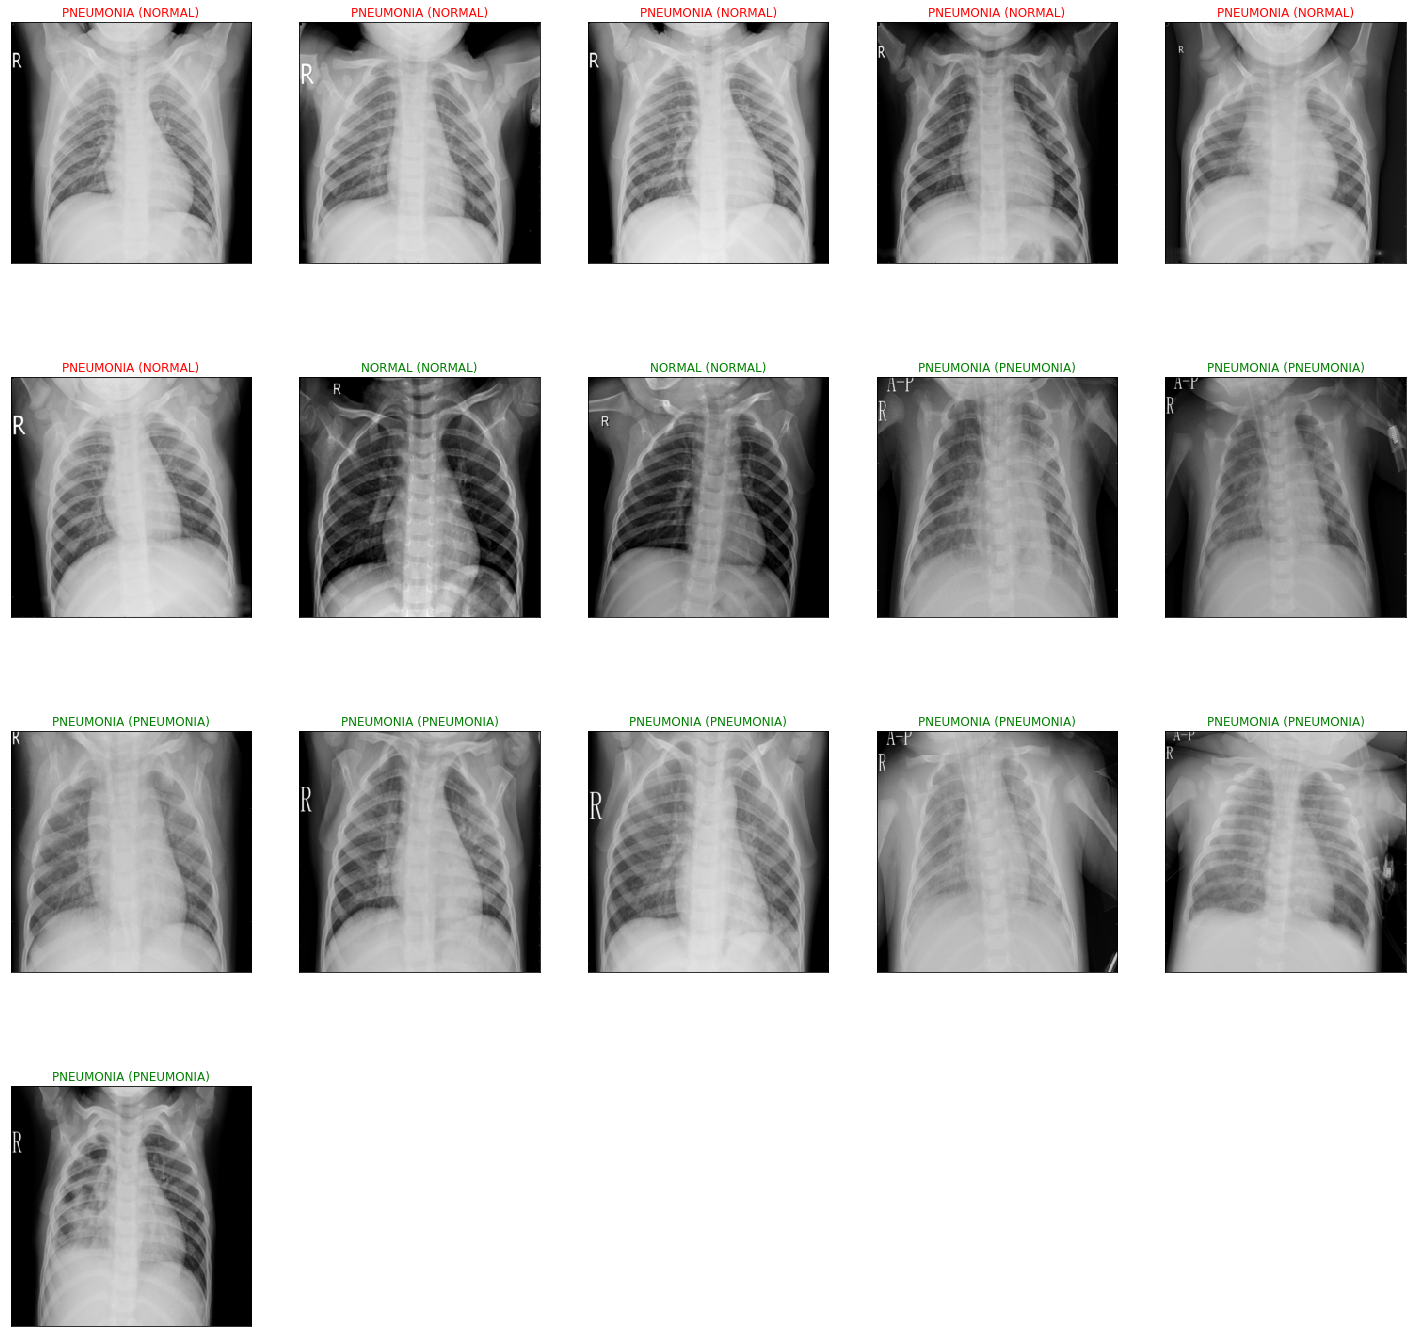

In [22]:
dataiter = iter(validation_loader)
images,labels = dataiter.next()
images = images.to(device)
labels = labels.to(device)
model.eval()
output = model(images)
_,preds = torch.max(output,1)

fig = plt.figure(figsize=(25,25))

acertos = 0
erros = 0

for idx in np.arange(len(images)):
  ax = fig.add_subplot(4,5,idx+1,xticks=[],yticks=[])
  plt.imshow(im_convert(images[idx]))  
  if preds[idx]==labels[idx]:
    acertos = acertos +1
  else:
    erros = erros +1
  ax.set_title("{} ({})".format(str(classes[preds[idx].item()]),str(classes[labels[idx].item()])),color=('green' if preds[idx]==labels[idx] else "red"))
  
print('acertos: {} \nerros:{}'.format(acertos,erros))

In [23]:
from sklearn.metrics import confusion_matrix
nb_classes = 2

confusion_matrix = torch.zeros(nb_classes, nb_classes)
with torch.no_grad():
    for i, (inputs, classes) in enumerate(validation_loader):#['val']):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

print(confusion_matrix)

tensor([[2., 6.],
        [0., 8.]])


In [24]:
print(confusion_matrix.diag()/confusion_matrix.sum(1))


tensor([0.2500, 1.0000])


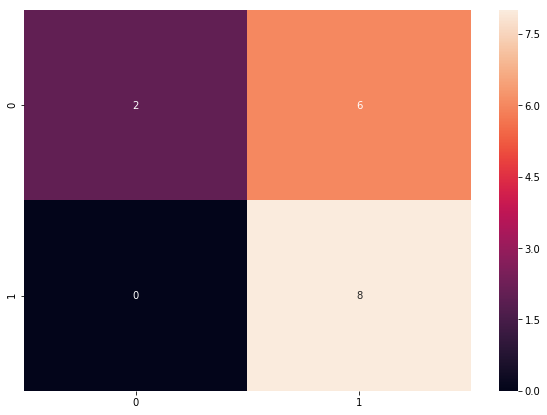

In [25]:
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize = (10,7))
sn.heatmap(confusion_matrix, annot=True)

In [26]:
class_correct = list(1. for i in range(10))
class_total = list(1. for i in range(10))

with torch.no_grad():
    for data in dataiter:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(len(classes)):    
    #print(i,class_total[i])
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of tensor(0, device='cuda:0') : 100 %
Accuracy of tensor(0, device='cuda:0') : 100 %
Accuracy of tensor(0, device='cuda:0') : 100 %
Accuracy of tensor(0, device='cuda:0') : 100 %
Accuracy of tensor(0, device='cuda:0') : 100 %
Accuracy of tensor(0, device='cuda:0') : 100 %
Accuracy of tensor(0, device='cuda:0') : 100 %
Accuracy of tensor(0, device='cuda:0') : 100 %
Accuracy of tensor(1, device='cuda:0') : 100 %
Accuracy of tensor(1, device='cuda:0') : 100 %


IndexError: ignored